In [270]:
import socket
import struct
import time
import multiprocessing
import matplotlib.pyplot as plt
import numpy as np

In [271]:
g = np.genfromtxt("../data/G-1.csv", dtype=np.float32, delimiter=",")

In [272]:
print(g[10000], g[10001])

-1.742987e-07 3.978862e-07


In [273]:
struct.pack("i", g.size)

b'\x80\xc6\x00\x00'

In [274]:
field = "arrayG"
field = bytes(field, "ascii")
struct.pack("iisi", 1, len(field), field, g.size)

b'\x01\x00\x00\x00\x06\x00\x00\x00a\x00\x00\x00\x80\xc6\x00\x00'

In [275]:
def field(name, valueSize):
    name = bytes(name, "ascii")
    return struct.pack("=i%dsi" % (len(name),), len(name), name, valueSize)

In [276]:
field("arrayG", g.size)

b'\x06\x00\x00\x00arrayG\x80\xc6\x00\x00'

In [277]:
def connect(g):
    g = g.tobytes()
    elapsed = time.perf_counter()
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as sock:
        sock.connect(("localhost", 3333))
        sock.sendall(struct.pack("=i", 1))
        sock.sendall(field("arrayG", len(g)))
        sock.sendall(g)
        f = sock.recv(3600*4, socket.MSG_WAITALL)
    elapsed = time.perf_counter() - elapsed
    print(f"Completed Execution in {elapsed} seconds")
    return f


In [278]:
#elapsed = time.perf_counter()
#with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as sock:
#    sock.connect(("localhost", 3333))
#    sock.sendall(g.tobytes())
#    f = sock.recv(3600*4, socket.MSG_WAITALL)
#    sock.close()
#elapsed = time.perf_counter() - elapsed
#print(f"Completed Execution in {elapsed} seconds")

In [279]:
img = connect(g)

Completed Execution in 5.341763852004078 seconds


In [280]:
img = np.frombuffer(img, dtype=np.float32)

In [281]:
def view(img):
    i = img.reshape(60, 60).transpose()
    return plt.imshow(i, "gray")

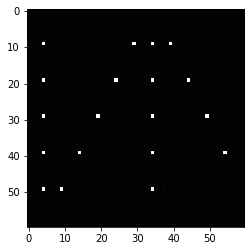

In [282]:
view(img)